Make all the pairs of real variables conditioned on one categorical variable scatter plots.

In [1]:
import pandas
import seaborn
import matplotlib.pyplot
import itertools
import statsmodels.api
import sklearn.preprocessing

In [2]:
penguins = pandas.read_csv(
    'https://raw.githubusercontent.com/JohnMount/Penguins/main/penguins.csv')
penguins_raw = pandas.read_csv(
    'https://raw.githubusercontent.com/JohnMount/Penguins/main/penguins_raw.csv')


print(penguins.shape)
penguins.head()

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [3]:
vars = [c for c in penguins.columns]
num_vars = [c for c in vars if str(penguins.dtypes[c]) != 'object']
cat_vars = [c for c in vars if str(penguins.dtypes[c]) == 'object']
cat_vars

['species', 'island', 'sex']

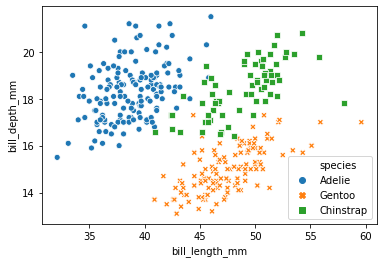

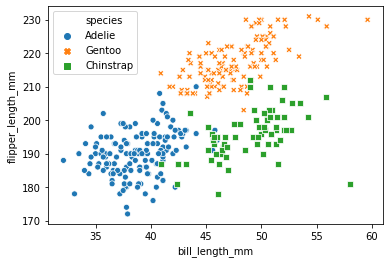

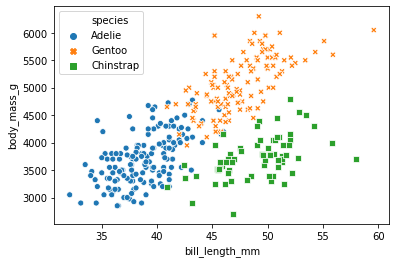

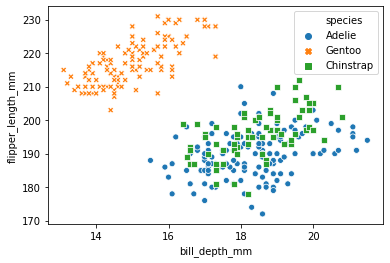

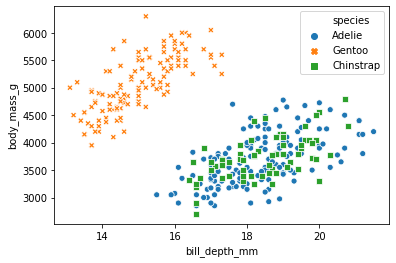

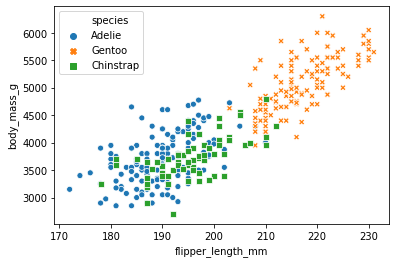

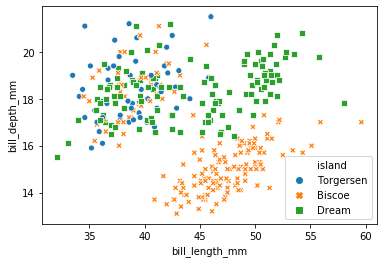

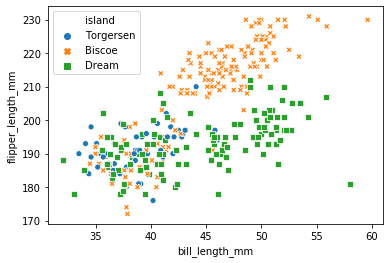

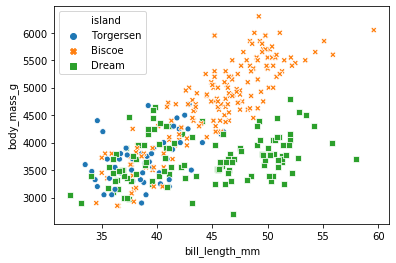

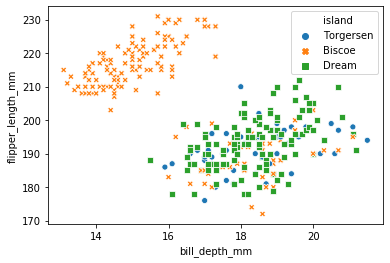

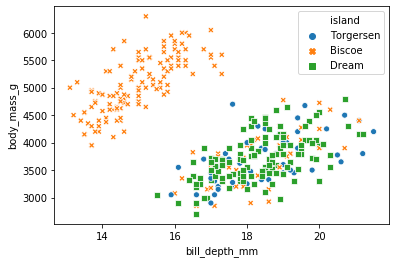

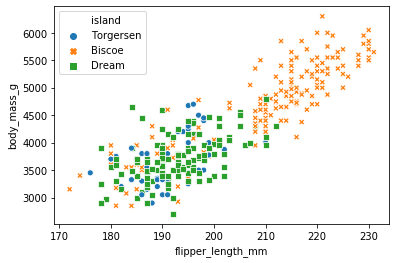

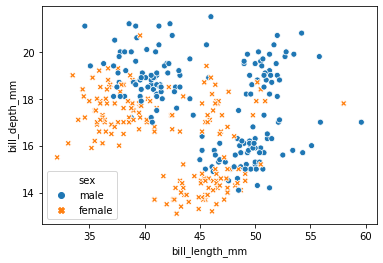

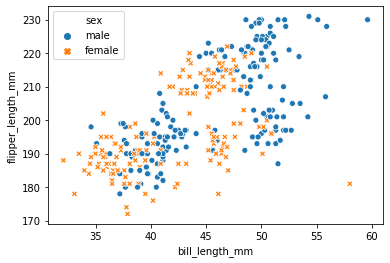

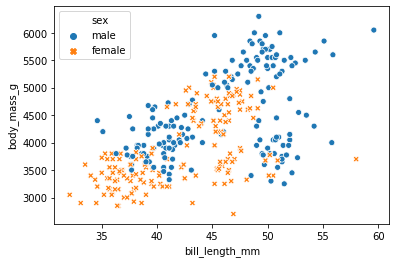

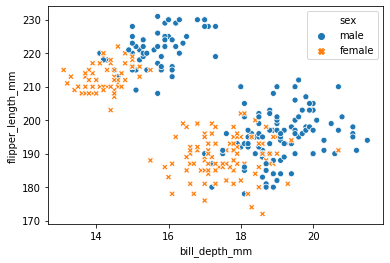

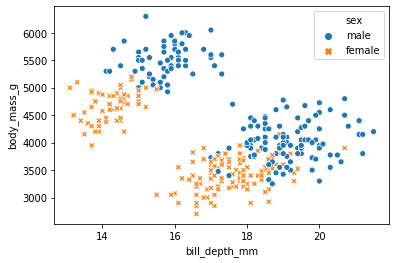

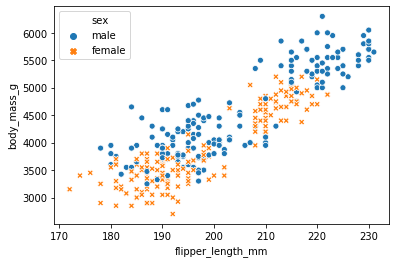

In [4]:
for g in cat_vars:
    for pair in itertools.combinations(num_vars, 2):
        seaborn.scatterplot(
            x=pair[0], 
            y=pair[1],
            hue=g, 
            style=g, 
            data=penguins)
        matplotlib.pyplot.show()

Isolate out a great [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox) example.

In [5]:
g = 'species'
v1 = 'bill_length_mm'
v2 = 'bill_depth_mm'

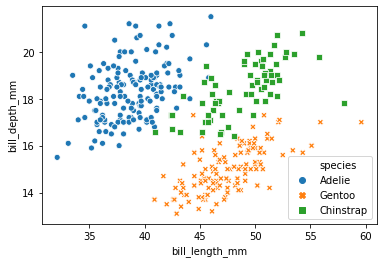

In [6]:
seaborn.scatterplot(
            x=v1, 
            y=v2,
            hue=g, 
            style=g, 
            data=penguins)

In [7]:
p_complete = penguins.dropna()
p_complete.reset_index(inplace=True, drop=True)
m1 = statsmodels.api.OLS(
    p_complete[v2], 
    statsmodels.api.add_constant(p_complete[[v1]])).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bill_depth_mm   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.26
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           2.53e-05
Time:                        16:47:09   Log-Likelihood:                -688.72
No. Observations:                 333   AIC:                             1381.
Df Residuals:                     331   BIC:                             1389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             20.7866      0.854     24.335      0.000      19.106      22.467
bill_length_mm    -0.0823      0.019     -4.273      0.000      -0.120      -0.044
==============================================================================
Omnibus:                       15.442   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.783
Skew:                          -0.014   Prob(JB):                       0.0337
Kurtosis:                       2.301   Cond. No.                         360.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
oh = sklearn.preprocessing.OneHotEncoder(sparse=False)
g_coded = pandas.DataFrame(oh.fit_transform(p_complete[[g]]))
g_coded.columns = [g + '_' + c for c in oh.categories_[0]]
p_coded = pandas.concat([p_complete, g_coded], axis=1)

In [9]:
p_coded

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,1.0,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,1.0,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,1.0,0.0,0.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,1.0,0.0,0.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,0.0,1.0,0.0
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,0.0,1.0,0.0
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,0.0,1.0,0.0
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,0.0,1.0,0.0


In [10]:
vars = [v1] + g_coded.columns.to_list()
vars

['bill_length_mm', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo']

In [11]:
m2 = statsmodels.api.OLS(
    p_coded[v2], 
    p_coded[vars]).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bill_depth_mm   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     361.6
Date:                Tue, 23 Jun 2020   Prob (F-statistic):          8.88e-104
Time:                        16:47:09   Log-Likelihood:                -454.92
No. Observations:                 333   AIC:                             917.8
Df Residuals:                     329   BIC:                             933.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bill_length_mm        0.2004      0.018     11.337      0.000       0.166       0.235
species_Adelie       10.5653      0.691     15.291      0.000       9.206      11.924
species_Chinstrap     8.6322      0.871      9.910      0.000       6.919      10.346
species_Gentoo        5.4619      0.846      6.460      0.000       3.799       7.125
==============================================================================
Omnibus:                       14.762   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.812
Skew:                           0.468   Prob(JB):                     0.000368
Kurtosis:                       3.512   Cond. No.                     1.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notice the sign of the non-categorical coefficient changed.